<a href="https://colab.research.google.com/github/TanThinNguyen/aivietnam-course/blob/master/Tuan8/Tuan8_Bai4_Keras_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pwd

'/content/drive/My Drive/DL AIvietnam'

In [ ]:
cd /content/drive/My\ Drive/DL AIvietnam

/content/drive/My Drive/DL AIvietnam


**VD1: Bài toán dự đoán doanh thu**

In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# đọc dữ liệu từ file .csv
data = genfromtxt("advertising.csv", delimiter=',', skip_header=1)

In [ ]:
# Xem dữ liệu đọc được
data

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9],
       [  8.7,  48.9,  75. ,   7.2],
       [ 57.5,  32.8,  23.5,  11.8],
       [120.2,  19.6,  11.6,  13.2],
       [  8.6,   2.1,   1. ,   4.8],
       [199.8,   2.6,  21.2,  15.6],
       [ 66.1,   5.8,  24.2,  12.6],
       [214.7,  24. ,   4. ,  17.4],
       [ 23.8,  35.1,  65.9,   9.2],
       [ 97.5,   7.6,   7.2,  13.7],
       [204.1,  32.9,  46. ,  19. ],
       [195.4,  47.7,  52.9,  22.4],
       [ 67.8,  36.6, 114. ,  12.5],
       [281.4,  39.6,  55.8,  24.4],
       [ 69.2,  20.5,  18.3,  11.3],
       [147.3,  23.9,  19.1,  14.6],
       [218.4,  27.7,  53.4,  18. ],
       [237.4,   5.1,  23.5,  17.5],
       [ 13.2,  15.9,  49.6,   5.6],
       [228.3,  16.9,  26.2,  20.5],
       [ 62.3,  12.6,  18.3,   9.7],
       [262.9,   3.5,  19.5,  17. ],
       [142.9,  29.3,  12.6,  15. ],
 

In [ ]:
m = data.shape[0]   # 200   # data.shape = (200, 4)
X = data[:, :3] # lấy 3 cột đầu là đặc trưng
y = data[:, 3]  # lấy cột cuối là label

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X - avg) / (maxi - mini)   # chuẩn hóa dữ liệu

In [ ]:
X

array([[ 5.50426788e-01, -9.83586370e-02,  7.57928475e-03],
       [-7.57540486e-02, -9.32979082e-02, -7.37297571e-02],
       [-1.67859312e-01, -7.10307018e-02,  7.91666667e-03],
       [ 2.85244602e-01, -8.65502699e-02, -2.85205803e-02],
       [ 3.84097503e-01, -1.89451754e-01, -2.88579622e-02],
       [-1.96536775e-01, -6.09092443e-02,  2.71474359e-02],
       [-3.18943995e-02, -1.15227733e-01, -1.46604251e-01],
       [ 1.79644062e-01, -1.59762146e-01, -1.86752699e-01],
       [-1.96874157e-01, -2.18803981e-01, -2.22515182e-01],
       [ 4.48200067e-01, -2.17117072e-01, -1.54364035e-01],
       [-2.87955466e-03, -2.06320850e-01, -1.44242578e-01],
       [ 4.98469973e-01, -1.44917341e-01, -2.12393725e-01],
       [-1.45592105e-01, -1.07467949e-01, -3.55431849e-03],
       [ 1.03058367e-01, -2.00247976e-01, -2.01597503e-01],
       [ 4.62707490e-01, -1.14890351e-01, -7.06933198e-02],
       [ 4.33355263e-01, -6.49578273e-02, -4.74139676e-02],
       [ 2.85593792e-03, -1.02407220e-01

In [ ]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
# Xây dựng model
model = Sequential([
    Dense(units=1, input_shape=[3])
])
model.compile(optimizer=SGD(learning_rate=0.05), loss=MeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
7/7 [==============================] - 0s 3ms/step - loss: 155.4421
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 41.3774
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 20.5874
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 15.2215
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 13.1718
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 12.2556
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 11.5087
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 10.8716
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 10.2959
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 9.7816
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 9.3092
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 8.8640
Epoch 13/1000
7/7 [====================

In [ ]:
print(type(history.history))

<class 'dict'>


In [ ]:
history.history

{'loss': [155.44212341308594,
  41.377376556396484,
  20.587377548217773,
  15.22154426574707,
  13.171764373779297,
  12.255610466003418,
  11.508728981018066,
  10.871593475341797,
  10.295924186706543,
  9.781622886657715,
  9.309232711791992,
  8.863982200622559,
  8.486666679382324,
  8.13363265991211,
  7.757986545562744,
  7.515694618225098,
  7.217587947845459,
  6.987942695617676,
  6.771822929382324,
  6.5809736251831055,
  6.427524566650391,
  6.297693252563477,
  6.177624702453613,
  6.078948974609375,
  5.9481048583984375,
  5.861734390258789,
  5.760420322418213,
  5.690123081207275,
  5.616868495941162,
  5.555526256561279,
  5.514519691467285,
  5.41328239440918,
  5.374813079833984,
  5.319900035858154,
  5.298831939697266,
  5.2684102058410645,
  5.225594520568848,
  5.196971893310547,
  5.169984817504883,
  5.163626194000244,
  5.108432292938232,
  5.092278003692627,
  5.068707466125488,
  5.064507961273193,
  5.024951934814453,
  4.999258041381836,
  5.0060567855834

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[16.235287 ],
        [24.720297 ],
        [ 2.4695551]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([14.723081], dtype=float32)>]

In [ ]:
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[16.235287 ],
       [24.720297 ],
       [ 2.4695551]], dtype=float32)>

In [ ]:
model.layers[0].weights[1]

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([14.723081], dtype=float32)>

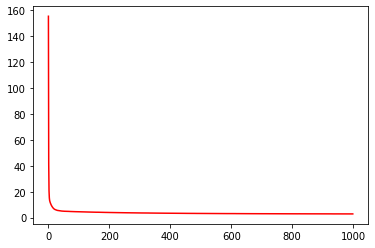

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color="r")
plt.show()

**VD2: Bài toán dự đoán giá nhà**

In [ ]:
import tensorflow as tf

# load dataset
boston_housing = tf.keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
from sklearn.utils import shuffle
# shuffle training set
#train_data, train_labels = shuffle(train_data, train_labels)

In [ ]:
print("Training set: {}".format(train_data.shape))  # (404, 13)
print("Testing set: {}".format(test_data.shape))    # (102, 13)

Training set: (404, 13)
Testing set: (102, 13)


In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
# Tính toán mean, std
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [ ]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [ ]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [ ]:
# Chuẩn hóa dữ liệu
train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError

In [ ]:
# Xây dựng model
model1 = Sequential([
    Dense(units=64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    Dense(units=64, activation=tf.nn.relu),
    Dense(units=1)
])

# Compile
opt = RMSprop()
loss = MeanSquaredError()
metric = MeanAbsoluteError()

model1.compile(optimizer=opt, loss=loss, metrics=[metric])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model1.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 32ms/step - loss: 519.4745 - mean_absolute_error: 20.9580 - val_loss: 536.9307 - val_mean_absolute_error: 20.6971
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 442.2185 - mean_absolute_error: 18.9252 - val_loss: 448.9527 - val_mean_absolute_error: 18.6494
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 358.5309 - mean_absolute_error: 16.9830 - val_loss: 357.9282 - val_mean_absolute_error: 16.3282
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 273.4547 - mean_absolute_error: 14.3424 - val_loss: 265.9780 - val_mean_absolute_error: 13.6783
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 193.9684 - mean_absolute_error: 11.4261 - val_loss: 185.4369 - val_mean_absolute_error: 11.0197
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 131.0818 - mean_absolute_error: 9.0067 - val_loss: 124.5336 - val_mean_absolute_e

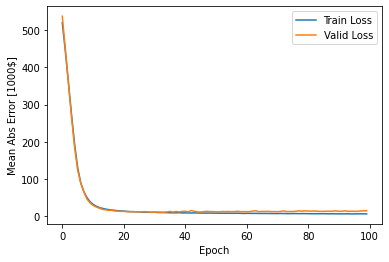

In [ ]:
# 
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error [1000$]")

plt.plot(history.epoch, np.array(history.history["loss"]), label="Train Loss")
plt.plot(history.epoch, np.array(history.history["val_loss"]), label="Valid Loss")

plt.legend()
plt.show()

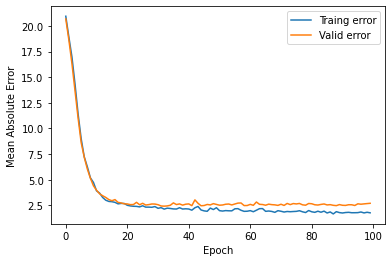

In [ ]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")

plt.plot(history.epoch, history.history["mean_absolute_error"], label="Train error")
plt.plot(history.epoch, history.history["val_mean_absolute_error"], label="Valid error")

plt.legend()
plt.show()

In [ ]:
history.epoch

In [ ]:
history.history

In [ ]:
# Dự đoán 
test_predict = model1.predict(test_data)

In [ ]:
test_labels

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [ ]:
test_predict

array([[ 8.834192 ],
       [19.430517 ],
       [21.372679 ],
       [33.533955 ],
       [24.82425  ],
       [21.479265 ],
       [27.012676 ],
       [21.351995 ],
       [20.39509  ],
       [24.310137 ],
       [19.814344 ],
       [16.463474 ],
       [16.973684 ],
       [41.144855 ],
       [22.025524 ],
       [19.302692 ],
       [26.326694 ],
       [21.952482 ],
       [21.343445 ],
       [41.312607 ],
       [12.703925 ],
       [16.133759 ],
       [20.880186 ],
       [15.4455185],
       [19.204075 ],
       [26.330074 ],
       [31.636024 ],
       [27.980175 ],
       [11.640572 ],
       [20.438816 ],
       [19.818123 ],
       [15.904746 ],
       [31.283447 ],
       [24.648611 ],
       [20.088898 ],
       [10.05046  ],
       [16.482391 ],
       [19.391645 ],
       [22.221182 ],
       [25.6063   ],
       [31.098587 ],
       [27.776026 ],
       [16.689327 ],
       [41.137566 ],
       [29.489307 ],
       [24.855291 ],
       [26.31441  ],
       [15.77

In [ ]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])